## Analyzing the World Happiness Data

### Examining correlations in data

In this exercise, we will examine further relationships in the WHR data, with a focus on correlations among variables.

As before, we'll repeat here some of the code developed in a previous exercise so that we can continue to work with data in this exercise. Execute the next few code cells to load and reconfigure the data. Rather than examining the full dataset, we will just examine the data from 2015-2017, which we will store in a dataframe named ```df1517```.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [3]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
df1517 = df[df.year.isin(range(2015,2018))]
df1517.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
7,Afghanistan,2015,3.98,0.55,0.34,7.47,0.53,51.69,0.39,0.09,0.88
8,Afghanistan,2016,4.22,0.56,0.35,7.46,0.56,52.02,0.52,0.06,0.79
9,Afghanistan,2017,2.66,0.50,0.37,7.46,0.49,52.34,0.43,-0.11,0.95
17,Albania,2015,4.61,0.69,0.35,9.30,0.64,68.69,0.70,-0.09,0.88
18,Albania,2016,4.51,0.68,0.32,9.34,0.64,68.87,0.73,-0.02,0.90


### Step 1

We previously used pairwise scatterplots to examine relationships among components of the WHR dataset, and noted based on visual inspection some patterns of correlation and anticorrelation.  We can quantify those patterns by computing pairwise correlations among all the WHR variables that we are examining.

Pandas provides the ```corr``` method on dataframes that computes pairwise correlations among all columns.  With no optional arguments, the method computes Pearson correlations among all pairs of columns, although other methods can be optionally specified instead.

In the code cell below, write and evaluate an expression that computes all the pairwise correlations of the dataframe ```df1517```, and assign the result to the variable ```correlations```.  

Examine the ```correlations``` dataframe after it is computed.  Note that the row and column labels are identical, such that any entry in the resulting matrix reflects the correlation between the row-column pair.  And since correlations are symmetric, i.e., corr(x,y) = corr(y,x), the matrix of correlation values is also symmetric about the diagonal.

## Graded Cell

This cell is worth 30% of the grade for this assignment.

In [7]:
correlations = df1517.corr()
correlations

,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
year,1.00,0.03,-0.03,0.06,0.02,0.03,0.02,0.09,-0.07,-0.00
Happiness,0.03,1.00,0.54,-0.46,0.80,0.74,0.76,0.54,0.15,-0.44
Positive,-0.03,0.54,1.00,-0.43,0.33,0.46,0.31,0.62,0.29,-0.32
Negative,0.06,-0.46,-0.43,1.00,-0.41,-0.58,-0.44,-0.35,-0.09,0.34
LogGDP,0.02,0.80,0.33,-0.41,1.00,0.71,0.86,0.36,-0.02,-0.38
Support,0.03,0.74,0.46,-0.58,0.71,1.00,0.67,0.38,0.07,-0.25
Life,0.02,0.76,0.31,-0.44,0.86,0.67,1.00,0.33,0.01,-0.33
Freedom,0.09,0.54,0.62,-0.35,0.36,0.38,0.33,1.00,0.31,-0.49
Generosity,-0.07,0.15,0.29,-0.09,-0.02,0.07,0.01,0.31,1.00,-0.35
Corruption,-0.00,-0.44,-0.32,0.34,-0.38,-0.25,-0.33,-0.49,-0.35,1.00


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [8]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testCorr

try:
    print(testCorr(correlations, df1517))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


### Step 2

Visualization of the correlation matrix is useful with a heatmap.  Seaborn (sns) provides a useful heatmap function.

Prior to making the heatmap, you will probably want to create a matplotlib figure that is bigger than the default size, since the heatmap will otherwise be a bit difficult to read.  You can use a command like ```plt.figure(figsize=(12,10))``` in the first line of the code cell below.  By creating the larger figure first, seaborn (which uses matplotlib for plotting) will insert the heatmap into the existing figure rather than creating a new one.

Make a call with the `sns.heatmap` function to display your computed correlation matrix.  Pass in additionally the option ```annot=True``` so that the numerical values of each entry are displayed on top of the heatmap, as well as the option ```square=True``` so that it will make with heatmap with a square aspect ratio.  

It is possible that your heatmap might get clipped off at the top and the bottom, because of recent changes made to matplotlib.  If you find that is the case, you should be able to fix this by first assigning the output of the heatmap function to a variable named ```ax``` (short for Axes), and then resetting the y-axis limits with the following command: ```ax.set_ylim(len(correlations), -0.5)```

## Graded Cell

This cell is worth 40% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="corrStep2.png" width=600 height=600  align="left"/>

(10.0, -0.5)

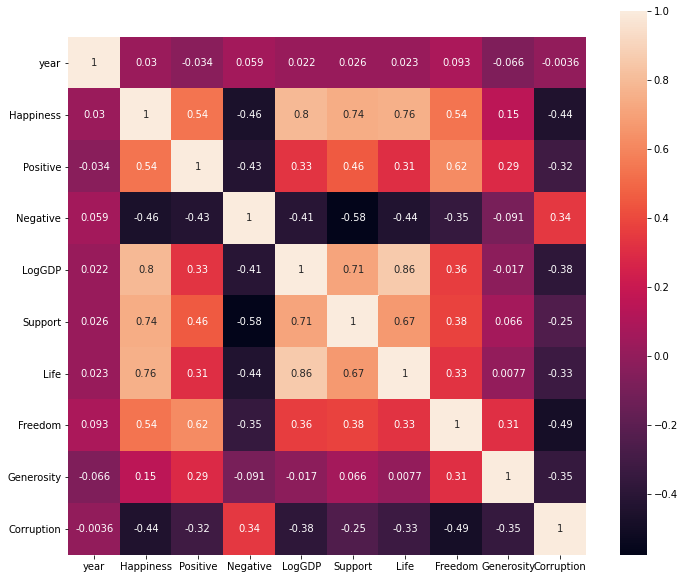

In [14]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(data = correlations, annot = True, square=True)
ax.set_ylim(len(correlations), -0.5)

Note the patterns of positive and negative correlation.  We noticed previously that LogGDP, Support, and Life all showed reasonably strong positive correlation with Happiness, and that Corruption showed negative correlation.  That is explicitly shown here.  And because we computed correlations over all columns of the dataframe, we also see information about the correlation of each variable with year.  The fact that no variable shows particularly strong correlation (positive or negative) with year indicates that the data are approximately constant over time, i.e., there are no strong temporal trends that are apparent.

### Step 3

We can dig down a bit further into specific data relationships.  Seaborn provides a function called ```regplot``` (short for regression plot) that both presents a scatterplot of a pair of variables and estimates a linear regression of the data.  

We will examine linear regression in more detail in a subsequent exercise, but we note for now that it is a method that estimates a relationship between two variables by fitting a straight line to data points relating those variables.  As we have seen, sometimes when we perform a scatterplot of two components of a dataset, we see that they tend to be correlated in such a way that the points in the scatterplot tend to lie near a line.  (And we have summarized those correlations in the heatmap above).  In such a situation, performing a linear regression to characterize the relationship between those variables can be useful.  By performing a linear regression, we can estimate the line that best fits the data points.

The Seaborn ```regplot``` function bundles together a scatterplot of two data variables with an estimate of the best fitting line, producing a figure showing both the data points and the regression line.  In addition to estimating a best fit line, ```regplot``` also estimates and plots confidence intervals for that fit (which are represented as light blue shaded regions about the best-fit line).  A confidence interval is a representation of how much uncertainty there is in the estimate of the best-fit line: in principle, the exact best-fit line could lie anywhere within the confidence interval.

We have noted previously that Happiness and LogGDP show somewhat strong positive correlation.

Use the ```regplot``` function in Seaborn to perform a plot of 'Happiness' (on the y-axis) vs. 'LogGDP' (on the x-axis), using the data in ```df1517```.  Note the linear fit to the data indicated by the line, and the shaded area around the line that indicates the confidence interval.  (The fact that the confidence interval is rather narrow indicates that for this pair of variables, the linear fit is well supported statistically, even though there is obviously substantial scatter about the best-fit line.)

## Graded Cell

This cell is worth 30% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="corrStep3.png" width=400 height=400  align="left"/>

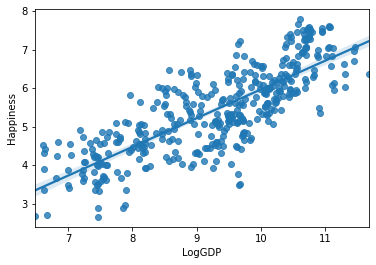

In [16]:
sns.regplot(data = df1517, x='LogGDP', y = 'Happiness')

### Step 4

Perform another `regplot` to examine the relationship between 'Happiness' on the y-axis and 'Generosity' on the x-axis.  You should note now that while there is a weak positive correlation between these quantities, the confidence interval is not as tight as in the previous plot, indicating that there is greater uncertainty in the slope and intercept of the best-fit line.

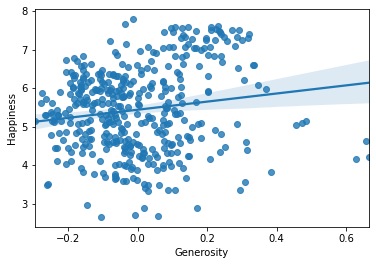

In [17]:
sns.regplot(data = df1517, x='Generosity', y = 'Happiness')

Unfortunately, even though ```sns.regplot``` is a very convenient function for getting a quick glimpse at the linearity of the relationship between two data variables, there is no apparent way to get quantitative information about the fit or the confidence interval from this function, other than what is presented visually in the plot.  This is not ideal, since one typically wants to report the parameters of such a fit.

Fortunately, there are other Python packages that can be used to get such quantitative information, and we will examine one of those in the next exercise.